In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nopath='/content/drive/MyDrive/brain_tumor_dataset/no/1 no.jpeg'

In [ ]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

In [ ]:
noi=Image.open(nopath)

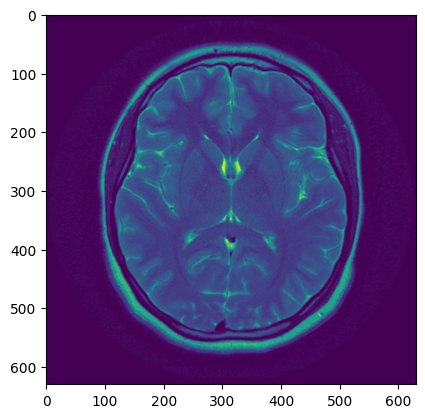

In [ ]:
noia=asarray(noi)
plt.imshow(noia)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Path to your dataset
dataset_path = '/content/drive/My Drive/brain_tumor_dataset'
yes_path = os.path.join(dataset_path, 'yes')
no_path = os.path.join(dataset_path, 'no')

In [ ]:
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:

# Train the model without early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Number of epochs to train for
    validation_data=validation_generator
)


Epoch 1/10
6/6 [==============================] - 53s 7s/step - loss: 1.2790 - accuracy: 0.6199 - val_loss: 0.6019 - val_accuracy: 0.7188
Epoch 2/10
6/6 [==============================] - 22s 3s/step - loss: 0.5428 - accuracy: 0.7602 - val_loss: 0.5055 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 19s 3s/step - loss: 0.4778 - accuracy: 0.8070 - val_loss: 0.4714 - val_accuracy: 0.7500
Epoch 4/10
6/6 [==============================] - 20s 4s/step - loss: 0.4560 - accuracy: 0.8187 - val_loss: 0.5552 - val_accuracy: 0.8125
Epoch 5/10
6/6 [==============================] - 19s 3s/step - loss: 0.4076 - accuracy: 0.8129 - val_loss: 0.4268 - val_accuracy: 0.8125
Epoch 6/10
6/6 [==============================] - 20s 3s/step - loss: 0.3865 - accuracy: 0.8538 - val_loss: 0.5284 - val_accuracy: 0.7812
Epoch 7/10
6/6 [==============================] - 21s 4s/step - loss: 0.2912 - accuracy: 0.8713 - val_loss: 0.4539 - val_accuracy: 0.8125
Epoch 8/10
6/6 [==================

In [ ]:
model.save('/content/drive/My Drive/brain_tumor_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/My Drive/brain_tumor_cnn_model.h5')


In [ ]:
notest='/content/drive/MyDrive/brain_tumor_dataset/no/15 no.jpg'

In [ ]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path, img_height=224, img_width=224):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image (same as during training)
    return img_array


In [ ]:
img=load_and_preprocess_image(notest,224,224)

In [ ]:
def predict_image(model, image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction


In [ ]:
prediction=predict_image(model,notest)

1/1 [==============================] - 0s 148ms/step


In [ ]:
def display_prediction(image_path, prediction):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Use argmax to find the index of the highest probability
    prediction_class = np.argmax(prediction, axis=-1)
    class_label = 'Tumor' if prediction_class == 1 else 'No Tumor'

    plt.title(f"Prediction: {class_label}")
    plt.show()


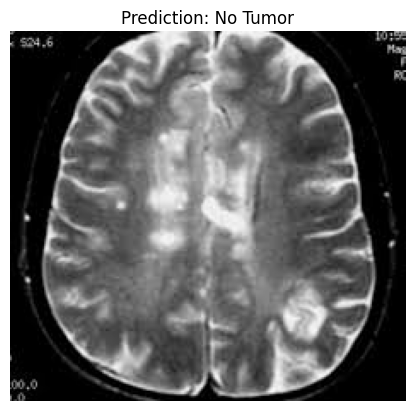

In [ ]:
display_prediction(notest,prediction)

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 M

In [ ]:
!pip install --upgrade gradio


In [ ]:
import gradio as gr

In [ ]:
def load_and_preprocess_image(img, img_height=224, img_width=224):
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



In [ ]:
def predict_image(image):
    img_array = load_and_preprocess_image(image)
    prediction = model.predict(img_array)
    print("Raw model prediction:", prediction)

    if prediction.shape[1] == 1:
        class_label = 'Tumor' if prediction[0][0] >= 0.5 else 'No Tumor'
    else:
        prediction_class = np.argmax(prediction, axis=-1)
        class_label = 'Tumor' if prediction_class == 1 else 'No Tumor'

    return class_label




In [ ]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type='pil'),
    outputs=gr.Textbox()
)



In [ ]:
# Launch the interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://402508517c74488b69.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
